Pending notebook....


Q1. How did tech stocks perform post-COVID compared to other sectors?

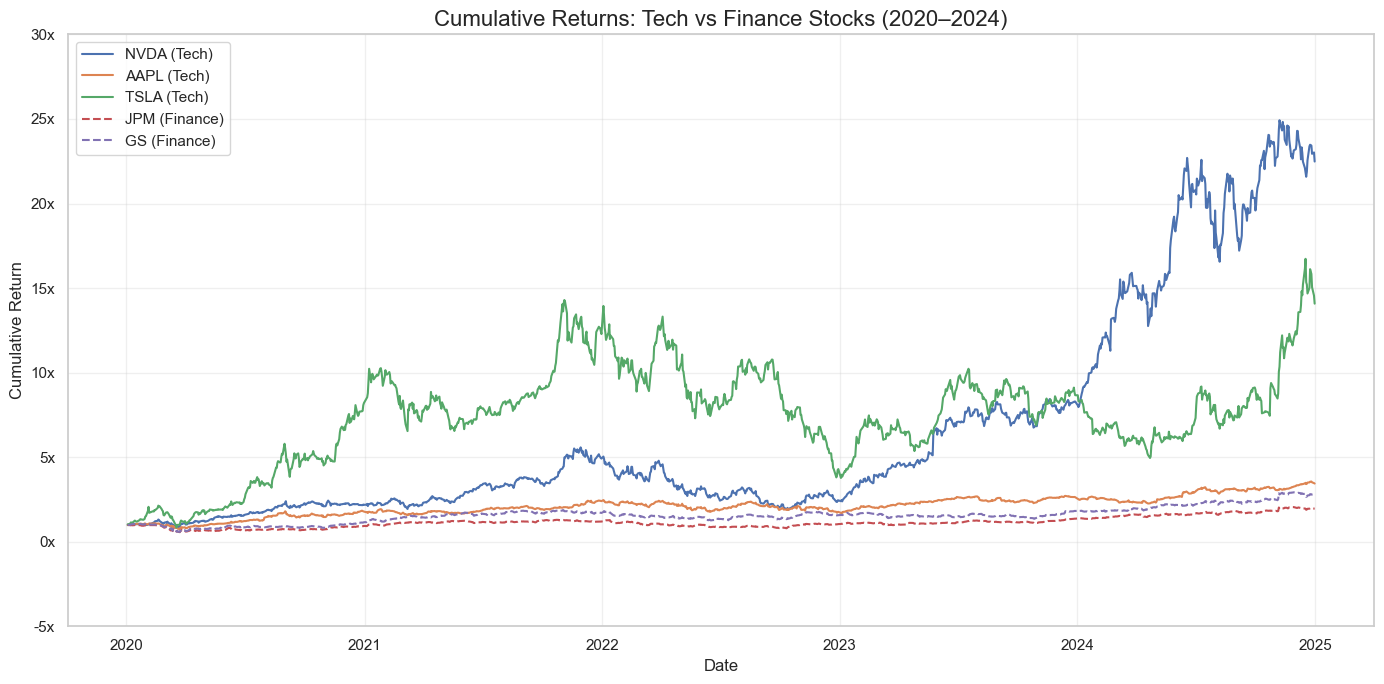

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# tickers
tech_tickers = ['NVDA', 'AAPL', 'TSLA']
fin_tickers = ['JPM', 'GS']
processed_path = "../data/processed/"

# Load data
def load_processed_data( ticker ):
    file_path = os.path.abspath( os.path.join( processed_path, f"{ticker}_processed.csv" ) )
    df = pd.read_csv( file_path, parse_dates = ['Date'], index_col = 'Date' )
    df['Cumulative Return'] = ( 1 + df['Daily Return'] ).cumprod( )
    df['Ticker'] = ticker
    return df

# Combining data
all_data = pd.concat( [load_processed_data( t ) for t in tech_tickers + fin_tickers] )
all_data['Sector'] = all_data['Ticker'].apply( lambda x: 'Tech' if x in tech_tickers else 'Finance')



# Plot
sns.set_style( "whitegrid" )
plt.figure( figsize=( 14, 7 ) )
palette = sns.color_palette( "tab10" )

for i, ticker in enumerate( tech_tickers + fin_tickers ):
    subset = all_data[all_data['Ticker'] == ticker]
    linestyle = '-' if ticker in tech_tickers else '--'
    plt.plot( subset.index, subset['Cumulative Return'],
             label = f"{ticker} ( {'Tech' if ticker in tech_tickers else 'Finance'} )",
             linestyle = linestyle, linewidth = 1.5 )

plt.grid( True, alpha = 0.3 )

yticks = plt.yticks()[0]
plt.yticks( yticks, [f"{y:.0f}x" for y in yticks] )

plt.title( "Cumulative Returns: Tech vs Finance Stocks ( 2020–2024 )", fontsize = 16 )
plt.xlabel( "Date", fontsize = 12 )
plt.ylabel( "Cumulative Return", fontsize = 12 )
plt.legend()
plt.tight_layout()
plt.show()

Taking a look at this plot—it really tells a story about how different sectors have fared since 2020. On the tech side, the growth was phenomenal.

NVIDIA, for example, jumped to nearly 25 times its original value as 2024 came to a close and while Tesla had its ups and downs, it was still able to  achieved impressive gains and Apple delivered steady, consistent growth.

In contrast, the finance players like JPMorgan and Goldman Sachs followed a measured pace. They ended up doubling or even tripling in value, but still couldn't come close to tech sector.

Overall, the plot clearly tells us that, post-COVID, tech stocks surged ahead dramatically as compared to the finance stocks.

----

Q2. What was the impact on NVIDIA’s stock prices before and after major product launches?

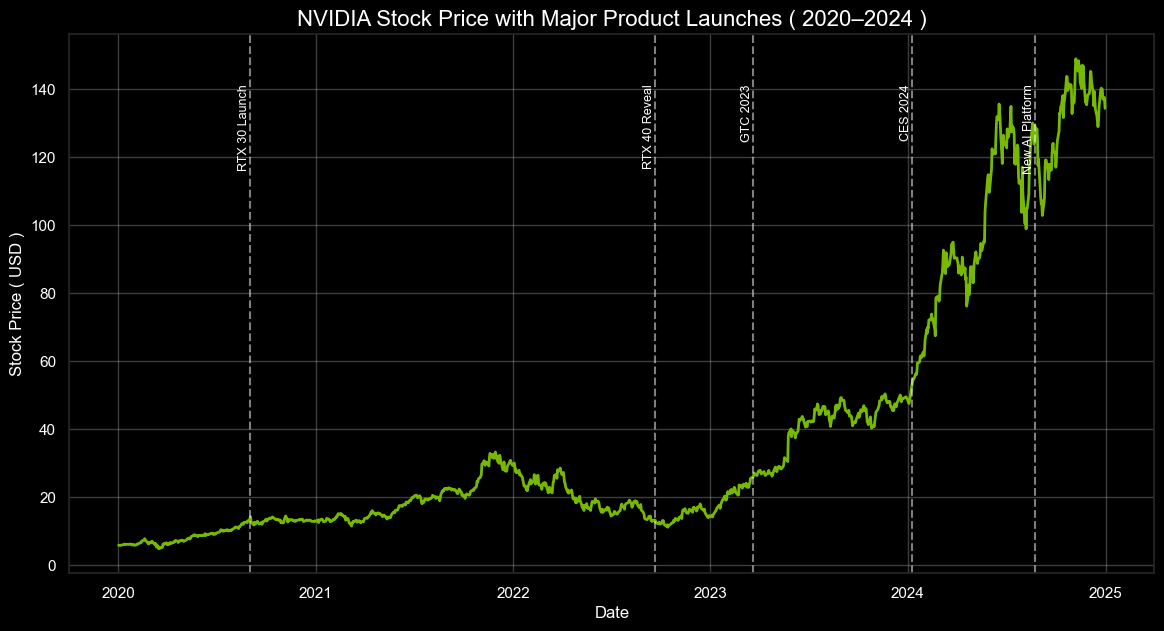

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use( 'dark_background' )
sns.set_style( "white" )

# dates and labels

event_dates = {
    "2020-09-01": "RTX 30 Launch",
    "2022-09-20": "RTX 40 Reveal",
    "2023-03-21": "GTC 2023",
    "2024-01-08": "CES 2024",
    "2024-08-23": "New AI Platform"
}

# data

processed_path = "../data/processed/"
ticker = "NVDA"
file_path = os.path.abspath( os.path.join( processed_path, f"{ticker}_processed.csv" ) )
df_nvda = pd.read_csv( file_path, parse_dates=['Date'], index_col='Date' )
df_nvda['Cumulative Return'] = ( 1 + df_nvda['Daily Return'] ).cumprod( )

# Plot

fig, ax = plt.subplots( figsize=( 14, 7 ) )
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.plot( df_nvda.index, df_nvda['Close'], color = "#76B900", linewidth = 2 )                           # ( NVIDIA green: #76B900 ) Source : https://www.brandcolorcode.com/nvidia

# events
for date_str, label in event_dates.items():

    event_date = pd.to_datetime(date_str)

    if event_date in df_nvda.index:
        ax.axvline( event_date, color = 'white', linestyle = '--', alpha = 0.5 )
        ax.text( event_date, df_nvda['Close'].max()*0.95, label, rotation = 90,
                verticalalignment = 'top', horizontalalignment = 'right', fontsize = 9, color = 'white' )

# Labels and formatting
ax.set_title( "NVIDIA Stock Price with Major Product Launches ( 2020–2024 )", fontsize = 16, color = 'white' )
ax.set_xlabel( "Date", fontsize = 12, color = 'white' )
ax.set_ylabel( "Stock Price ( USD )", fontsize = 12, color = 'white' )
ax.tick_params( colors = 'white' )
ax.grid( True, alpha = 0.3)
plt.show()


This plot tells us about NVIDIA's stock price trajectory from 2020 to 2024, specially around major product launches. It can be observed that post 2020, there was a strong upward trend.  
With the launch of RTX 30 series graphics cards in September of 2020, the stock followed a steady growth and with the reveal of the RTX 40 series cards, there was a modest dip and stability.NVIDIA's announcements focusing on AI at GTC 2023 and CES 2024, sparked a huge surge which later climbed sharply upward to the August 2024 event of a new AI platform. 
With these patterns, we can say that AI and product innovation milestones might be closely tied to momentums in stock.